In [1]:
import numpy as np
import pandas as pd
from dataset import ImagingDataset
from nilearn.interfaces.bids import get_bids_files
from tqdm import tqdm
import matplotlib.pyplot as plt

# get subject list
subj_list = list(np.loadtxt('subject_list_task.txt', dtype='str'))
ds = ImagingDataset(subj_list, '../data/')

# get motion data from ts confounds
fd_array = np.zeros((len(subj_list), 3750))
for i, subj in tqdm(enumerate(subj_list)):
    conf_files = get_bids_files(ds.deriv_path, modality_folder='func',
                            file_tag='timeseries', file_type='tsv',
                            filters=[('task', 'LST')],
                            sub_label=subj)
    df = pd.concat((pd.read_csv(f, delimiter='\t') for f in conf_files), ignore_index=True)
    fd_array[i,:] = df['framewise_displacement'].values.copy()

60it [00:28,  2.13it/s]


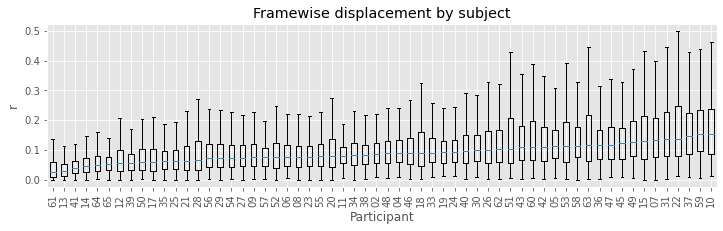

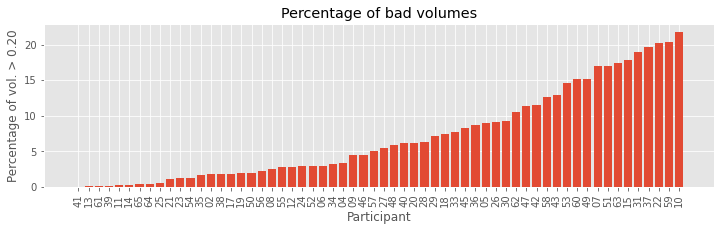

In [2]:
plt.style.use('ggplot')
# plot the avg
avg_fd = np.nanmedian(fd_array, axis=1)
idx = np.argsort(avg_fd)
y_labels_sorted = [subj_list[i] for i in idx]

plt.figure(figsize=(12, 3))
data = np.delete(fd_array, [0, 1250, 2500], axis=1)
plt.boxplot(data[idx, :].T, showfliers=False)
plt.xlabel('Participant')
plt.ylabel('r')
plt.xticks(ticks=range(1,len(y_labels_sorted)+1), labels=y_labels_sorted, rotation=90)
plt.title('Framewise displacement by subject')
plt.savefig('figs/FD_boxplot.jpeg')
plt.show()

# number of volumes above 0.2
fd_count = np.sum(fd_array > 0.2, axis=1) / len(fd_array)

# plot the avg
idx = np.argsort(fd_count)
y_labels_sorted = [subj_list[i] for i in idx]

plt.figure(figsize=(12, 3))
plt.bar(range(len(fd_count)), fd_count[idx])
plt.xlabel('Participant')
plt.ylabel('Percentage of vol. > 0.20')
plt.xticks(ticks=range(len(y_labels_sorted)), labels=y_labels_sorted, rotation=90)
plt.title('Percentage of bad volumes')
plt.savefig('figs/FD_countplot.jpeg')
plt.show()